# MATH 210 Project I

## Minimization of Functions with `scipy.optimize`



In mathematics, science, and engineering fields, SciPy is one of the core packages in Python-based ecosystem of open-source software and the subpackage `scipy.optimize` provides several commonly used optimization algorithms (see the [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)):

1. Optimization:
  * Local optimization and global optimization for functions
  * Equation (Local) Minimizers (Least-squares minimization)
  * Rosenbrock function
2. Curve fitting algorithms
3. Some algorithms about root finding
4. Linear programming and some utilities

No matter in mathematics, science, or engineering fields, finding the minimum of a function is a usual task for people to finish. Therefore, this notebook is going to teach people how to use computer(Python language) to find the minimum of a function.  **Our main goal** is to explore **three functions** in the subpackage `scipy.optimize` which **can find the local minimums and the global minimums of univariate function and multivariate function**. By the end of the notebook, the reader will be able to implement the following functions to find minimums of some functions:


#### Local Optimization
* `scipy.optimize.minimize` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize))
(can use for both multivariate function and univariate function)

#### Global Optimization
* `scipy.optimize.basinhopping` (see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping))
(can use for univariate function)
* `scipy.optimize.differential_evolution`(see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution))
(can use for multivariate function)

Our main purpose of doing this notebook is to help people solve their problems efficiently and quickly.

## Contents

1. Local minimum of univariate function and multivariate function: minimize
2. Global minimum of univariate function: basinhopping
3. Global minimum of multivariate function: differential_evolution
4. Exercises

In [1]:
import scipy.optimize as spo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Local Minimun of Univariate and Multivariate Function

In general, when we want to find the **minima** or **maxima** of a function, we usually need to use the [Derivative test](https://en.wikipedia.org/wiki/Derivative_test) to find the minima or maxima. First of all, we need to use First derivative test to calculate the critical points of the univariate function. Secondly, we use Second derivative test to judge every critical point is a minima or a maxima.

## Generally

### Example 1

Find the minima for:
$$
y = 5x^3+2x^2-3x
$$

First, use First derivative test. We calculate the derivative of y:
$$
y'= 15x^2 + 4x -3
$$

Let y' = 0, and find the critical points: $$x_1 = \frac{-3}{5}, x_2 = \frac{1}{3}$$

Second, use Second derivative test, we calculate the second derivative of y:$$y'' = 30x+4 $$

We test $x_1$, $$y''(x_1) = -14 , y''(x_1) < 0 $$, so $x_1$ is a maxima

We test $x_2$, $$y''(x_2) = 14 , y''(x_2) > 0$$, so $x_2$ is a minima.

In [4]:
## define our function
def a(x):
    return 5*x**3+2*x**2-3*x

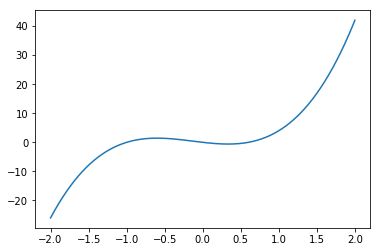

In [5]:
x = np.linspace(-2,2,1000)
plt.plot(x,a(x))

In [6]:
### Minima
a(1/3)

-0.5925925925925927

We found calculate this example problem is not very hard. But if the function becomes very complex, we will find it is boring to do this kind of problems. Then I will introduce you to use Python package (minimize) to solve this kind of problems.

### `scipy.optimize.minimize`
The function `minimize` can calculate the minima of scalar function of one or more variables. It takes at least two argements, first it takes a objective function, second it takes a number which is an initial guess. 

There are a lot of more optional inputs however they are not very useful. Another useful input argument is the 'bounds' which is used to calculate the minima within the bounds. You can see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) or enter `spo.minimize?` to explore them.


### Use minimize to calculate the minima and Compare with our Example 1

In [7]:
spo.minimize(a,x0 = 1)

      fun: -0.5925925925925922
 hess_inv: array([[ 0.07144909]])
      jac: array([  1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 0.33333333])

In [8]:
### the x value for minima
spo.minimize(a,x0 = 1).x

array([ 0.33333333])

In [9]:
### Minima
spo.minimize(a,x0 = 1).fun

-0.5925925925925922

In [11]:
### Minima
a(1/3)

-0.5925925925925927

We found our minima which is using minimize to calculate is almost the same with value calculated
by hand

In [12]:
xmin = spo.minimize(a,x0 = 1).x

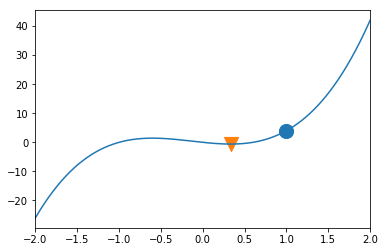

In [13]:
plt.plot(x, a(x))
plt.scatter(1, a(1), marker='o', s=200); #use circle to show the initial guess point
plt.scatter(xmin, a(xmin), marker='v', s=200); #use triangle to show the minima
plt.xlim(-2, 2);

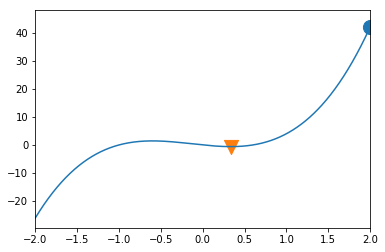

In [14]:
plt.plot(x, a(x))
plt.scatter(2, a(2), marker='o', s=200); #use circle to show the initial guess point
plt.scatter(xmin, a(xmin), marker='v', s=200); #use triangle to show the minima
plt.xlim(-2, 2);

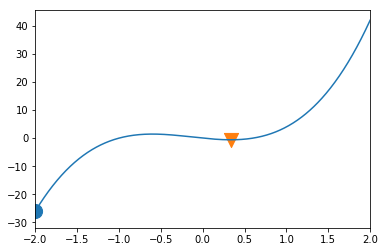

In [15]:
plt.plot(x, a(x))
plt.scatter(-2, a(-2), marker='o', s=200); #use circle to show the initial guess point
plt.scatter(xmin, a(xmin), marker='v', s=200); #use triangle to show the minima
plt.xlim(-2, 2);

These three picture show that no matter how far our initial guess point towards to our true minima, we always can find the nearst
minima beside the initial guess point.

### Apply minimize function to Multivariate Function

In [ ]:
# we use a sample function of two variables
def g(X):
    x,y = X
    return x**2+y**2

In [ ]:
spo.minimize(g, (1, 1)) ## (1,1) is the initial guess point.


In [ ]:
# the x value of the minima
spo.minimize(g, (1, 1)).x

In [ ]:
# Minima
spo.minimize(g, (1, 1)).fun

### 2. Global minimum of univariate function 

### `scipy.optimize.basinhopping`
The function `basinhopping` can calculate the  minimum value of scalar function of one variables. It takes at least two argements, first it takes a objective function, second it takes a number which is an initial guess. 

There are a lot of more optional inputs however they are not very useful.  You can see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping) or enter `spo.basinhopping?` to explore them.


In [ ]:
## Define our new function
def f(x):
    return 1-np.sin(x)/x
x = np.linspace(-20, 20, 1000)
y = f(x)

In [ ]:
x0 = 10
xmin = basinhopping(f,x0,stepsize = 5).x

In [ ]:
xmin

In [ ]:
## Minimum value
basinhopping(f,x0,stepsize = 5).fun

In [ ]:
plt.plot(x, y);
plt.scatter(x0, f(x0), marker='o', s=200)
plt.scatter(xmin, f(xmin), marker='v', s=200)
plt.xlim(-20, 20)

In [ ]:
x0=-19
plt.plot(x, y);
plt.scatter(x0, f(x0), marker='o', s=200)
plt.scatter(xmin, f(xmin), marker='v', s=200)
plt.xlim(-20, 20)

We can found no matter how for our initial guess point is far, we always can get the minimum value of our function.

### 3. Global minimum of Multivariate Function

### `scipy.optimize.differential_evolution`
The function `differential_evolution` can calculate the  minimum value of scalar function of two or more variables. It takes at least two argements, first it takes a objective function, second it takes the bounds. 

There are a lot of more optional inputs however they are not very useful.  You can see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution) or enter `spo.differential_evolution?` to explore them.


In [ ]:
We use the previous g function

In [ ]:
spo.differential_evolution(g,bounds = [(-5, 5), (-5, 5)])

In [ ]:
## the x value of g when it get its minimum.
spo.differential_evolution(g,bounds = [(-5, 5), (-5, 5)]).x

In [ ]:
## minimum value
spo.differential_evolution(g,bounds = [(-5, 5), (-5, 5)]).fun

## 4. Exercises

**Exercise 1.** Find the minima for the function: $$f(x)=x^3(x+4) $$

**Exercise 2.** Next find the minimum of the Ackley function. See the [wiki](https://en.wikipedia.org/wiki/Test_functions_for_optimization)

![function](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f00d1325d65d088f8ae6a96137e62021107921d)

![function](https://wikimedia.org/api/rest_v1/media/math/render/svg/565ef43958a50fb0ef473bdd46e30bfc725604a7)